# Detecting changes in slope with an $\ell_0$ penalty

Detection de points de rupture avec une pénalité l0, tiré de l'article de Maidstone et al [2017](https://arxiv.org/pdf/1701.01672)

In [21]:
from src.cpop import CPOP
import numpy as np
from src.utils import generate_process
import matplotlib.pyplot as plt
from src.cost import LogCost
from scipy.stats import median_abs_deviation

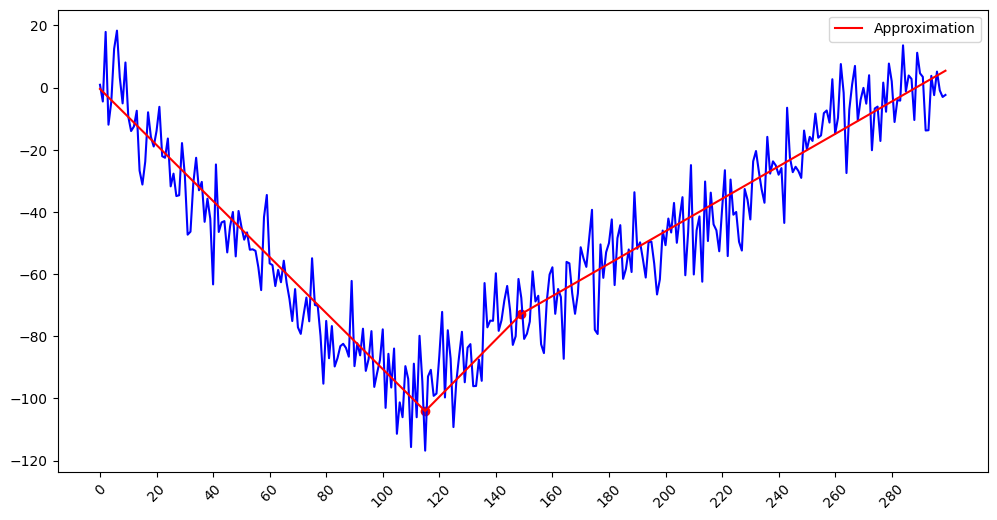

In [14]:
true_sigma = 10

y = generate_process(T=300, k=5, sigma=true_sigma, scale=2)
detector = CPOP(y, beta=2*np.log(len(y)))
detector.run()
detector.compute_approx_and_plot(stride=20)

### Now let's see the impact of $\hat{\sigma}$ on a simple example

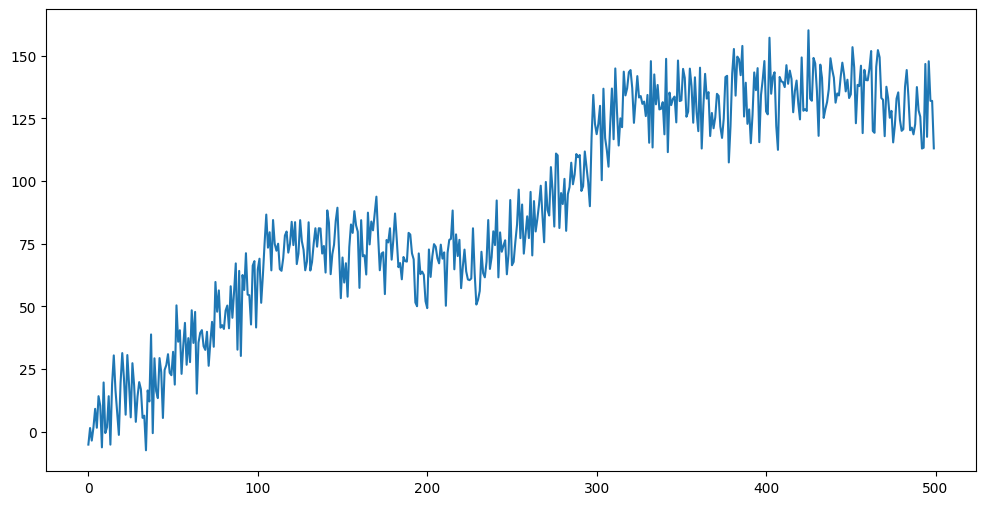

In [54]:
true_sigma=10
y = generate_process(T=500, k=8, sigma=true_sigma, scale=2)
plt.figure(figsize=(12,6))
plt.plot(y)
plt.show()

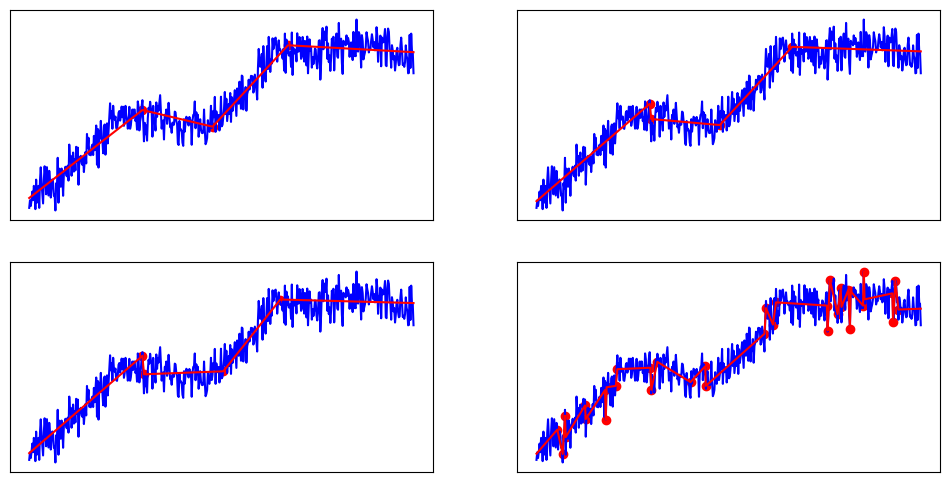

In [63]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

sigmas = [np.std(np.diff(y)), median_abs_deviation(np.diff(y)), true_sigma, true_sigma/2]
h = LogCost(1)
dict_ = {0: (0,0), 1: (0,1), 2: (1,0), 3: (1,1)}

for i, sigma in enumerate(sigmas):
    
    detector = CPOP(y, sigma=sigma, h=h, beta= 2*np.log(len(y)))
    detector.run()

    detector.compute_approx_and_plot(stride=20, verbose=False)
    axs[dict_[i][0], dict_[i][1]].plot( detector.y, color='blue')
    axs[dict_[i][0], dict_[i][1]].plot(detector.approx, c="r")
    axs[dict_[i][0], dict_[i][1]].scatter(np.arange(0, len(detector.y))[detector.ckpts[1:-1]], detector.approx[detector.ckpts[1:-1]],c="r")
    axs[dict_[i][0], dict_[i][1]].set_xticks([])
    axs[dict_[i][0], dict_[i][1]].set_yticks([])


In [27]:
true_sigma=50
y = generate_process(T=1000, k=5, sigma=true_sigma, scale=2.4)

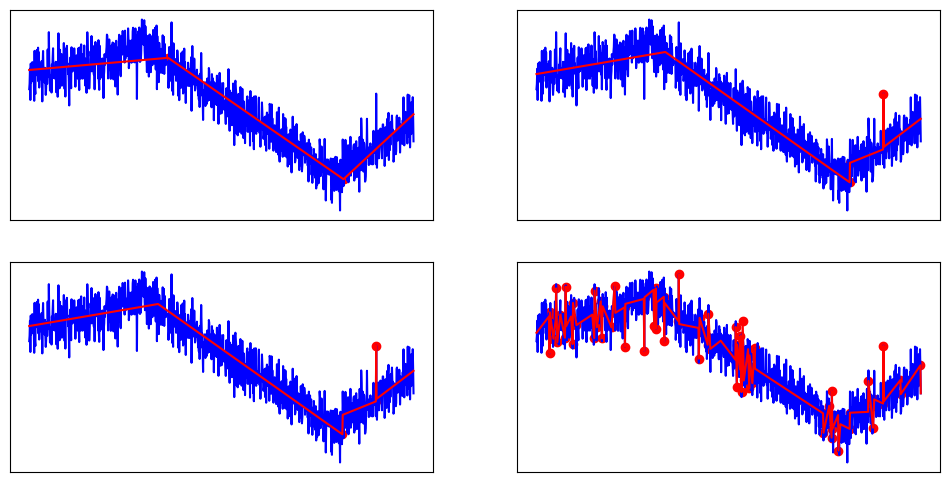

In [28]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

sigmas = [np.std(np.diff(y)), median_abs_deviation(np.diff(y)), true_sigma, true_sigma*0.65]
h = LogCost(1)
dict_ = {0: (0,0), 1: (0,1), 2: (1,0), 3: (1,1)}

for i, sigma in enumerate(sigmas):
    
    detector = CPOP(y, sigma=sigma, h=h, beta= 1*np.log(len(y)))
    detector.run()

    detector.compute_approx_and_plot(stride=20, verbose=False)
    axs[dict_[i][0], dict_[i][1]].plot( detector.y, color='blue')
    axs[dict_[i][0], dict_[i][1]].plot(detector.approx, c="r")
    axs[dict_[i][0], dict_[i][1]].scatter(np.arange(0, len(detector.y))[detector.ckpts[1:-1]], detector.approx[detector.ckpts[1:-1]],c="r")
    axs[dict_[i][0], dict_[i][1]].set_xticks([])
    axs[dict_[i][0], dict_[i][1]].set_yticks([])


The results highly depends on $\beta$ too. For instance, let's use a higher value for $\beta$

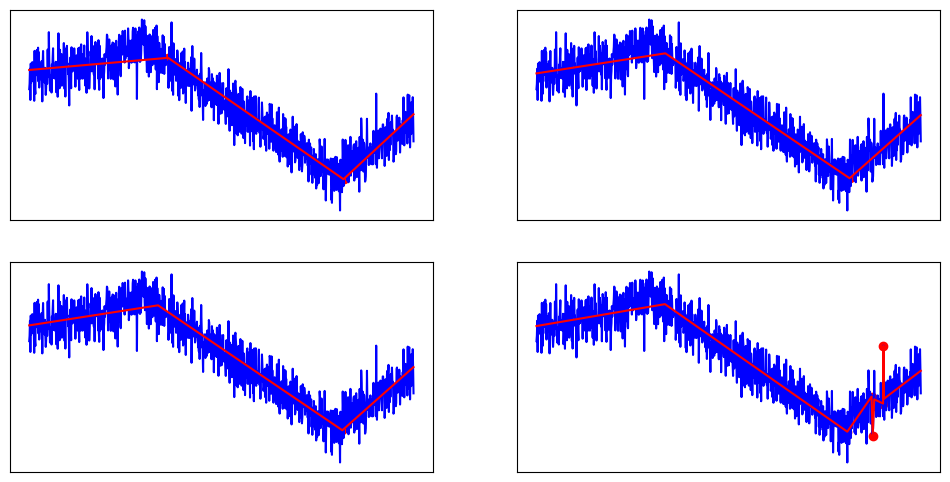

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(12, 6))

sigmas = [np.std(np.diff(y)), median_abs_deviation(np.diff(y)), true_sigma, true_sigma*0.65]
h = LogCost(1)
dict_ = {0: (0,0), 1: (0,1), 2: (1,0), 3: (1,1)}

for i, sigma in enumerate(sigmas):
    
    detector = CPOP(y, sigma=sigma, h=h, beta= 2*np.log(len(y)))
    detector.run()

    detector.compute_approx_and_plot(stride=20, verbose=False)
    axs[dict_[i][0], dict_[i][1]].plot( detector.y, color='blue')
    axs[dict_[i][0], dict_[i][1]].plot(detector.approx, c="r")
    axs[dict_[i][0], dict_[i][1]].scatter(np.arange(0, len(detector.y))[detector.ckpts[1:-1]], detector.approx[detector.ckpts[1:-1]],c="r")
    axs[dict_[i][0], dict_[i][1]].set_xticks([])
    axs[dict_[i][0], dict_[i][1]].set_yticks([])


$\sigma$ and $\beta$ has an impact on each other and it may be hard to select one while the other one is fixed.

## Statistical criterion to select $\beta$

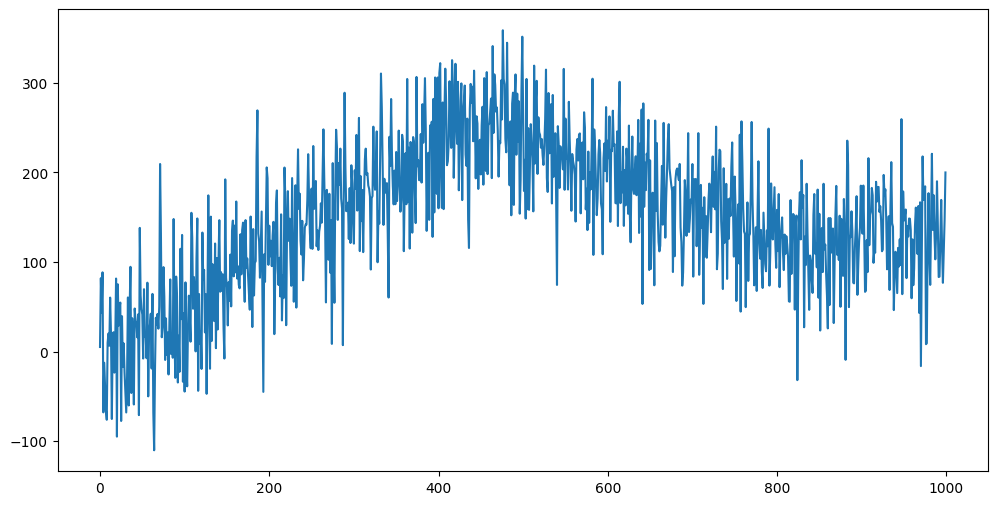

In [9]:
true_sigma=50
y = generate_process(T=1000, k=5, sigma=true_sigma, scale=2)
plt.figure(figsize=(12,6))
plt.plot(y)
plt.show()

### BIC

100%|██████████| 39/39 [00:16<00:00,  2.42it/s]


Beta for min BIC: 6.998646795810848
BIC: 10844.223483652182


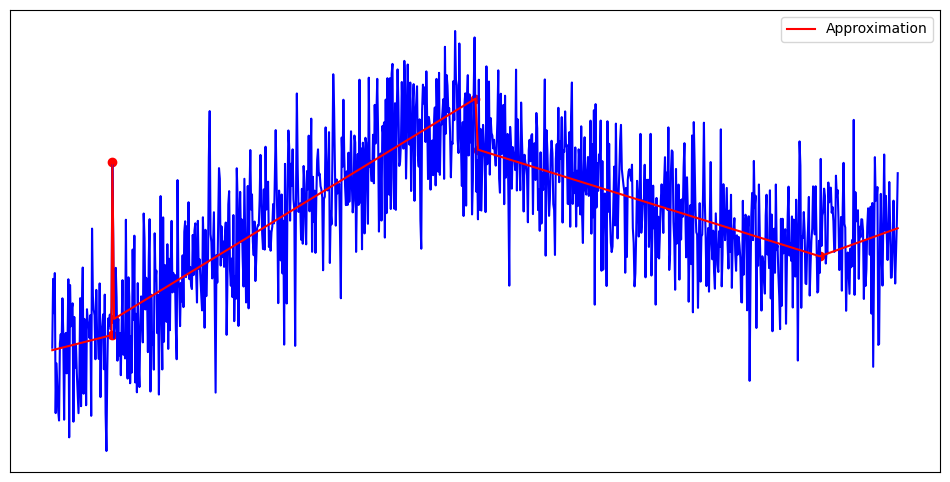

In [22]:
sigma = median_abs_deviation(np.diff(y))
h = LogCost(1)

detector = CPOP(y, sigma, h=h)
detector.compute_max_criterion(beta_range=np.linspace(0.5, 20, 39), log_n=True, upd_sigma=True, reset_sigma=False, noticks=True)

### AIC

100%|██████████| 39/39 [00:15<00:00,  2.48it/s]


Beta for min AIC: 3.4538776394910684
AIC: 10829.500217815235


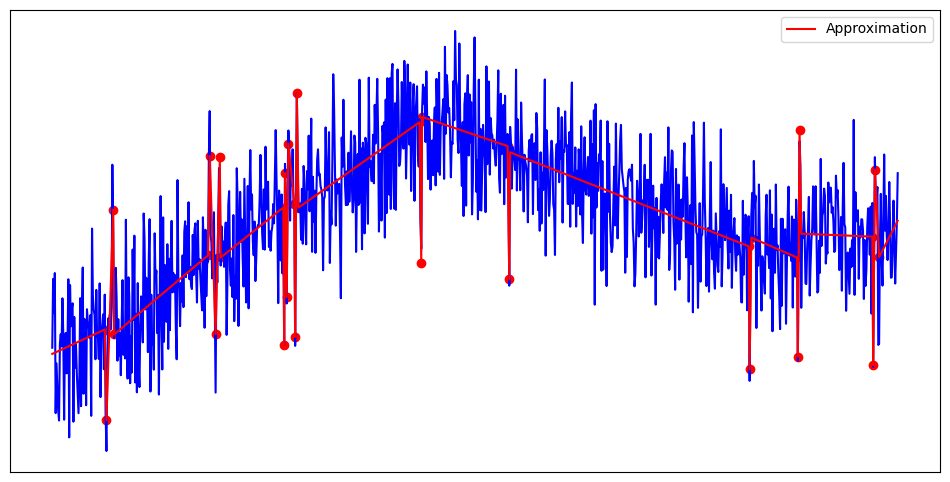

In [24]:
sigma = median_abs_deviation(np.diff(y))
h = LogCost(1)

detector = CPOP(y, sigma, h=h)
detector.compute_max_criterion(beta_range=np.linspace(0.5, 20, 39), upd_sigma=True, log_n=True, reset_sigma=False, criterion="AIC", noticks=True)

### modified BIC

100%|██████████| 39/39 [00:16<00:00,  2.40it/s]


Beta for min mBIC: 10.54341595213063
mBIC: 10881.691959350042


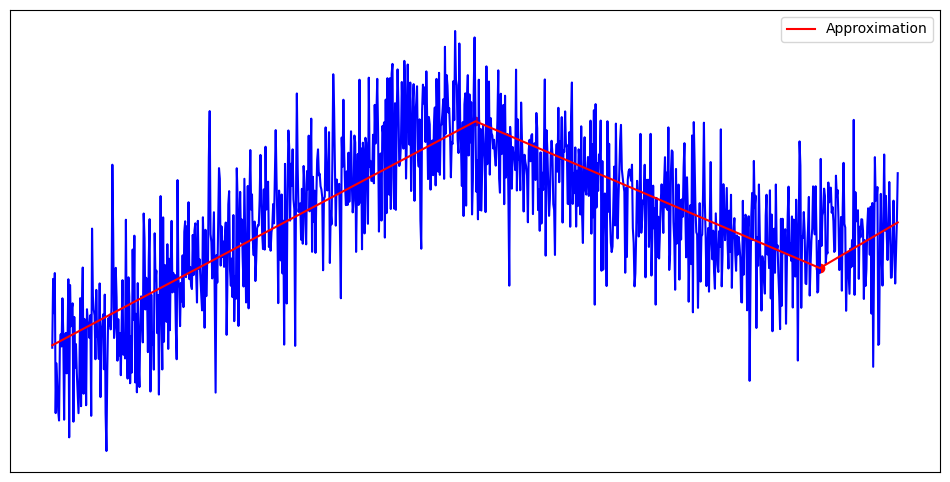

In [25]:
sigma = median_abs_deviation(np.diff(y))
h = LogCost(1)

detector = CPOP(y, sigma, h=h)
detector.compute_max_criterion(beta_range=np.linspace(0.5, 20, 39), log_n=True, upd_sigma=True, reset_sigma=False, criterion="mBIC", noticks=True)

Here we start from a low value of $\beta$ to a large one. When $\beta$ is low, we likeli underestimate $\sigma$, whereas if $\beta$ is large, we will overestimate it. We can try to start from a large value of $\beta$ to a low one to see if it changes the results.

100%|██████████| 39/39 [00:15<00:00,  2.52it/s]


Beta for min BIC: 6.998646795810848
BIC: 10845.202335931426


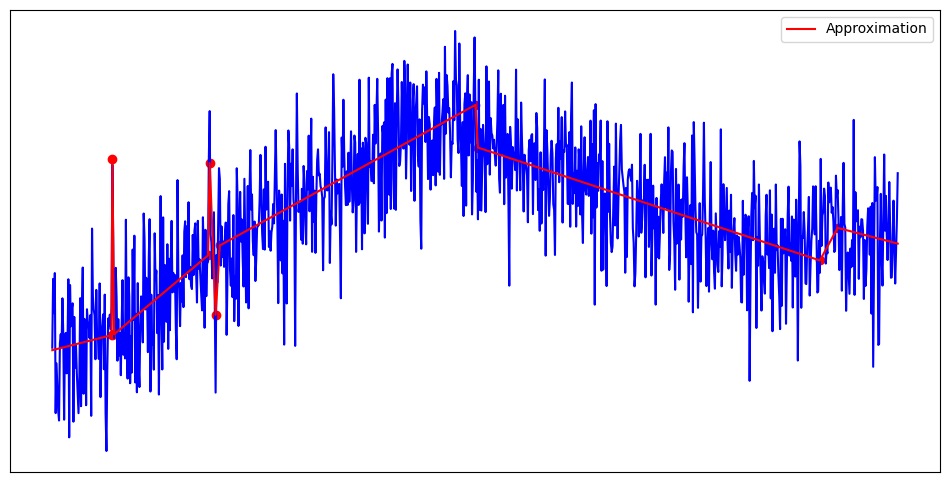

In [27]:
sigma = median_abs_deviation(np.diff(y))
h = LogCost(1)

detector = CPOP(y, sigma, h=h)
detector.compute_max_criterion(beta_range=np.linspace(0.5, 20, 39)[::-1], log_n=True, upd_sigma=True, reset_sigma=False, noticks=True)

100%|██████████| 39/39 [00:15<00:00,  2.53it/s]


Beta for min AIC: 3.4538776394910684
AIC: 10565.460285029445


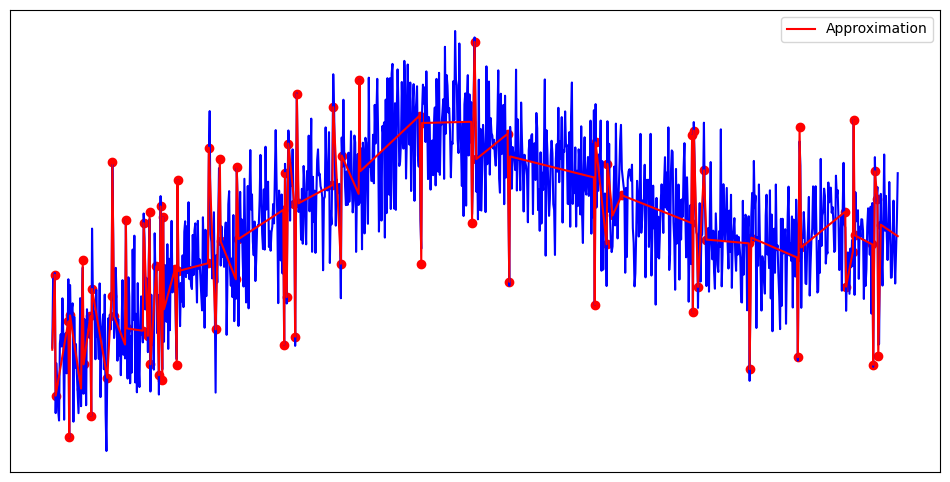

In [28]:
sigma = median_abs_deviation(np.diff(y))
h = LogCost(1)

detector = CPOP(y, sigma, h=h)
detector.compute_max_criterion(beta_range=np.linspace(0.5, 20, 39)[::-1], upd_sigma=True, log_n=True, reset_sigma=False, criterion="AIC", noticks=True)

  0%|          | 0/39 [00:00<?, ?it/s]

100%|██████████| 39/39 [00:16<00:00,  2.43it/s]


Beta for min mBIC: 6.998646795810848
mBIC: 11583.810698752344


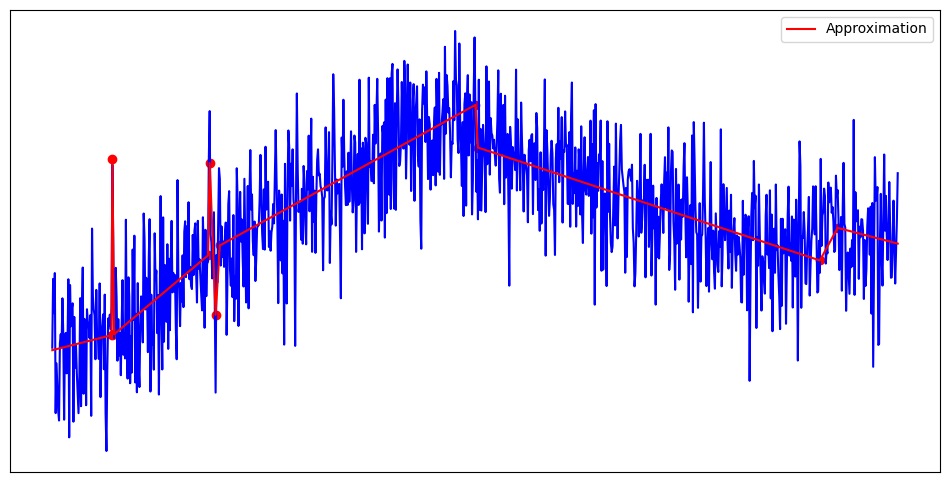

In [29]:
sigma = median_abs_deviation(np.diff(y))
h = LogCost(1)

detector = CPOP(y, sigma, h=h)
detector.compute_max_criterion(beta_range=np.linspace(0.5, 20, 39)[::-1], log_n=True, upd_sigma=True, reset_sigma=False, criterion="mBIC", noticks=True)

We tested it on several series and almost every time, it led to better results when starting from a low $\beta$ to a large $\beta$

### Noise Removal?

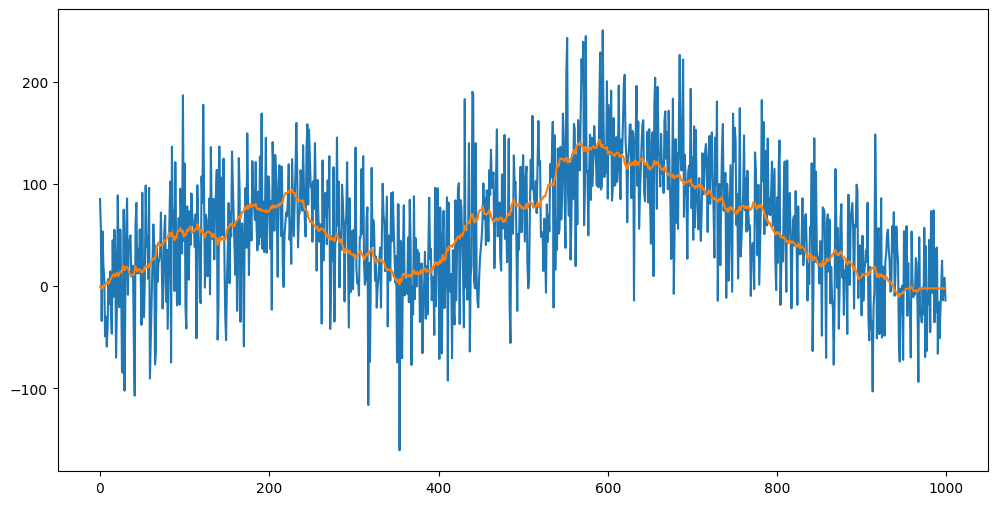

In [32]:
from src.utils import ssa_approx

true_sigma=50
y = generate_process(T=1000, k=5, sigma=true_sigma, scale=2)

y_hat = ssa_approx(y, m=1)
plt.figure(figsize=(12,6))
plt.plot(y)
plt.plot(y_hat)
plt.show()

  0%|          | 0/39 [00:00<?, ?it/s]/home/onyxia/work/CPD_MVA/src/cpop.py:265: RuntimeWarning: divide by zero encountered in scalar divide
  slope = (phis[i] - phis[i - 1]) / (ckpts[i] - ckpts[i - 1])
100%|██████████| 39/39 [00:42<00:00,  1.10s/it]


Beta for min BIC: 6.998646795810848
BIC: 6721.775370131302


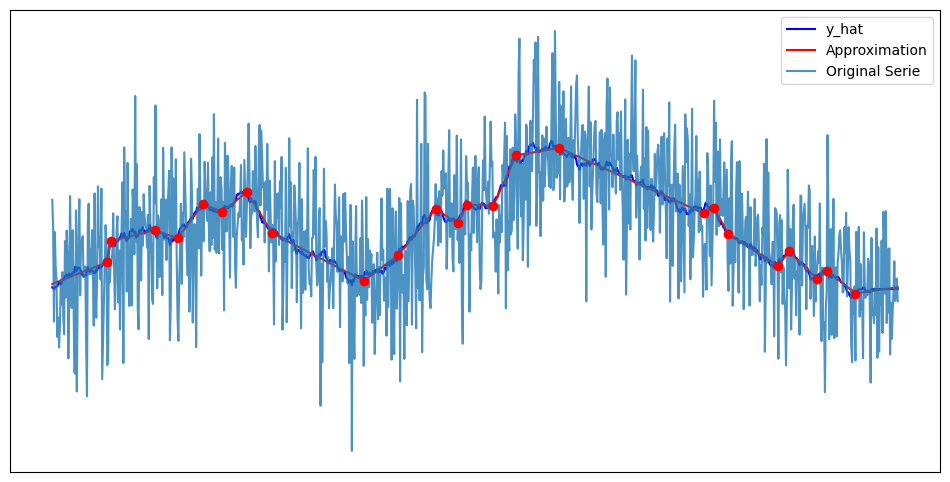

In [ ]:
sigma = median_abs_deviation(np.diff(y_hat))
h = LogCost(1)

detector = CPOP(y_hat, sigma, h=h)
detector.compute_max_criterion(beta_range=np.linspace(0.5, 200, 39), log_n=True, upd_sigma=True, reset_sigma=False, criterion="mBIC", noticks=True)

## Some experiences on real world Dataset

The purpose of this section is to show some results on real world data when using the simple strategy we propose:

```start from sigma = MAD( DIFF(y) )
for beta in range ...
    detector.run()
    detector.update_sigma()

select detector.min("criterion")```
return tau, phi that minimise the criterion

### GDP Argentina

  0%|          | 0/39 [00:00<?, ?it/s]

100%|██████████| 39/39 [00:00<00:00, 39.08it/s]


Beta for min AIC: 10.408450843654075
AIC: 3074.448684065515
BIC:  3044.581702120418


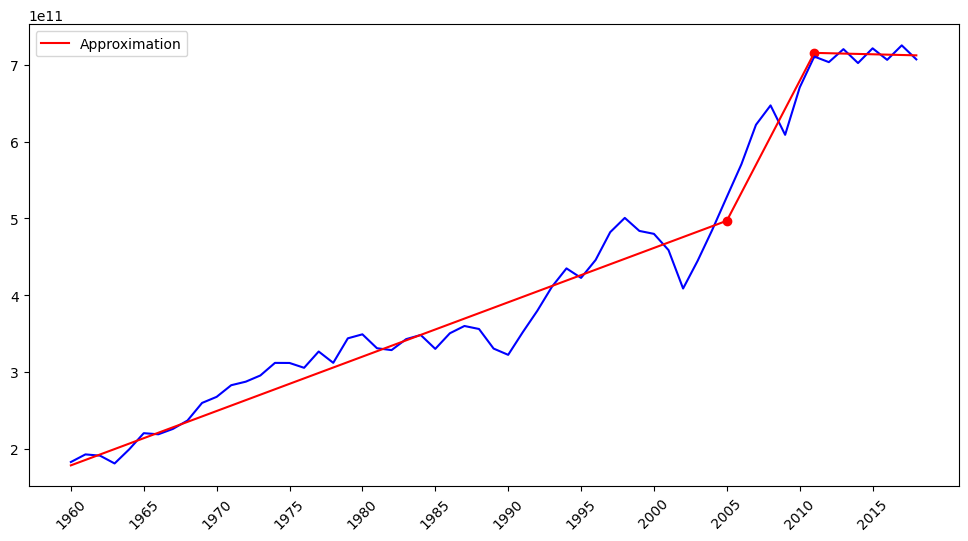

In [38]:
import pandas as pd
import json


### Non interesting treatment for the data set
df = pd.read_csv("../data/gdp.csv", skiprows=4)

sdf = df[df["Country Name"]=="Argentina"]

columns_years = [col for col in sdf.columns if col.isdigit()]
ts = sdf.loc[:, columns_years]

serie = ts.reset_index(drop=True).T
### 
y = serie[0].to_numpy()

h = LogCost(1)
sigma = median_abs_deviation(serie[0])


detector = CPOP(y, sigma, h=h, idxs=ts.columns)

detector.compute_max_criterion(beta_range=np.linspace(0.5, 20, 39), log_n=True, upd_sigma=True, verbose=True, reset_sigma=False, criterion="AIC", noticks=False)
print("BIC: ", float(detector.BIC()))


### GDP Iran

100%|██████████| 39/39 [00:01<00:00, 29.37it/s]


Beta for min BIC: 4.113869892264135
BIC: 4070.650187765371


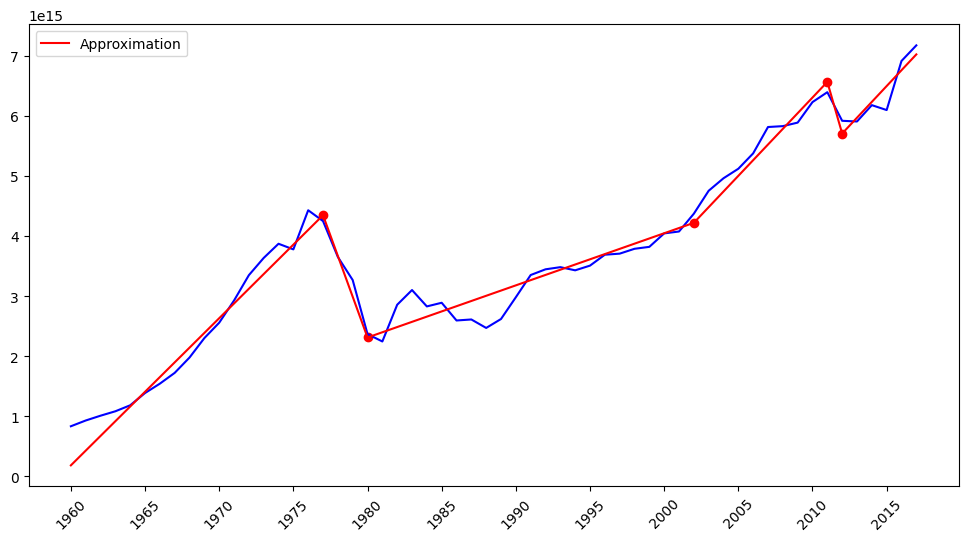

In [47]:
### Loading the data...
with open("../data/gdp_iran.json", "r") as file:
    data = json.load(file)

gdp_iran = np.array(data["series"][0]["raw"])
idxs = np.array(data["time"]["raw"])
###
sigma = median_abs_deviation(np.diff(gdp_iran))


h = LogCost(1)

beta = 10 * np.log(len(gdp_iran))

detector = CPOP(gdp_iran, sigma, beta, h, idxs=idxs)
detector.compute_max_criterion(beta_range=np.linspace(0.5, 20, 39), log_n=True, upd_sigma=True, verbose=True, reset_sigma=False, criterion="BIC", noticks=False)

1979 : Iranian's revolution
1980 : Iran-Irak war
2011 : Hard embargo

### Bitcoin

100%|██████████| 39/39 [00:10<00:00,  3.78it/s]


Beta for min mBIC: 18.087843202430534
mBIC: 7268.861948273422


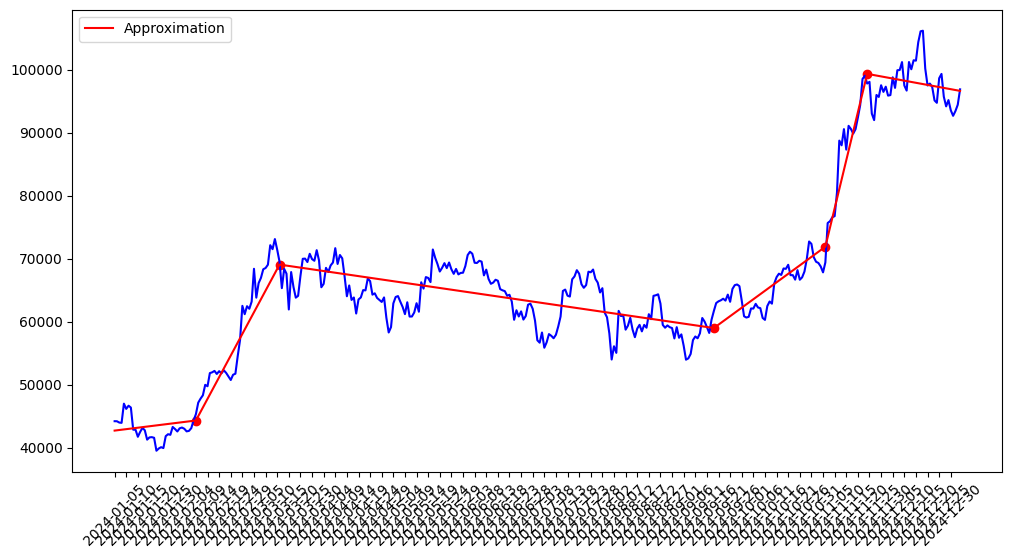

In [3]:
### Data loading ...
with open("../data/market-price.json", "r") as file:
    data = json.load(file)

market_price_data = data["market-price"]

df = pd.DataFrame(market_price_data)

df.rename(columns={"x": "timestamp", "y": "value"}, inplace=True)

df["timestamp"] = pd.to_datetime(df["timestamp"], unit='ms')

###

y = df["value"].to_numpy()


h = LogCost(1)
sigma = median_abs_deviation(np.diff(y))
beta = 5 * np.log(len(y))

detector = CPOP(y, sigma, beta, h, idxs=df["timestamp"].astype(str))
output = detector.run()
# Since here we have a longer time serie, we will use the mBIC
detector.compute_max_criterion(beta_range=np.linspace(0.5, 20, 39), log_n=True, upd_sigma=True, verbose=True, reset_sigma=False, criterion="mBIC", noticks=False)



100%|██████████| 39/39 [00:10<00:00,  3.83it/s]


Beta for min BIC: 5.9775275819191025
BIC: 7234.241725726539


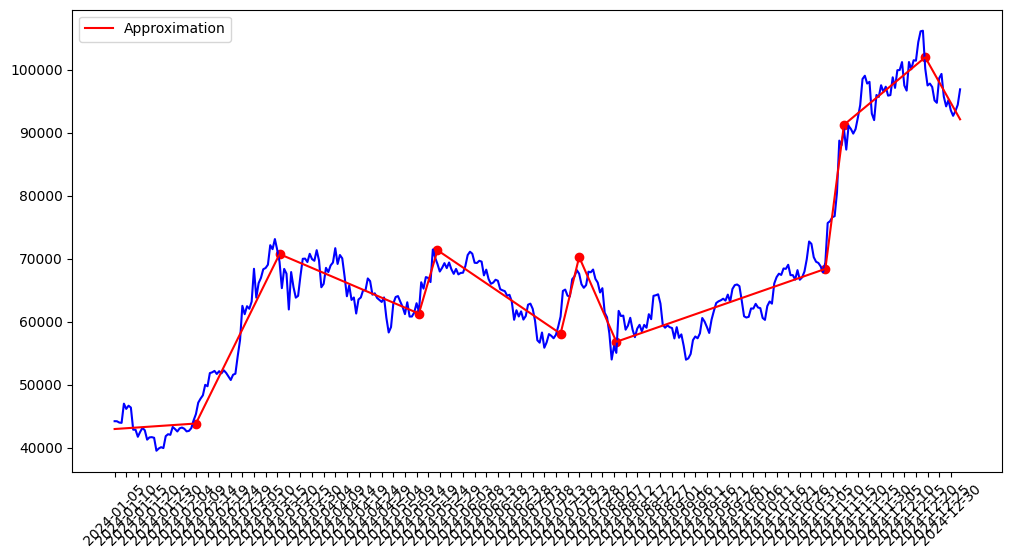

In [ ]:
y = df["value"].to_numpy()


h = LogCost(1)
sigma = median_abs_deviation(np.diff(y))
beta = 5 * np.log(len(y))

detector = CPOP(y, sigma, beta, h, idxs=df["timestamp"].astype(str))

# Since here we have a longer time serie, we will use the mBIC
detector.compute_max_criterion(beta_range=np.linspace(0.5, 20, 39), log_n=True, upd_sigma=True, verbose=True, reset_sigma=False, criterion="BIC", noticks=False)



### Euro Stock 500

[*********************100%***********************]  1 of 1 completed
100%|██████████| 39/39 [05:57<00:00,  9.16s/it]


Beta for min mBIC: 25.75809585786637
mBIC: 55605.6029131439


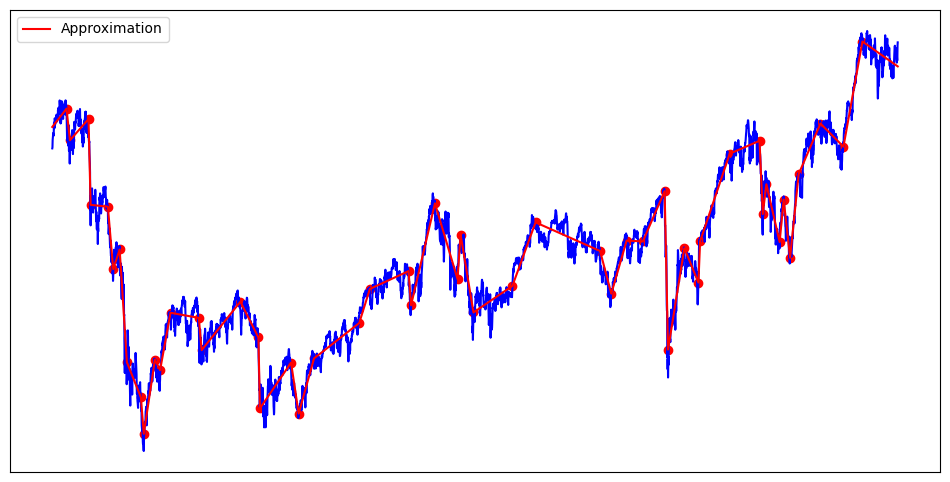

In [12]:
import yfinance as yf

euro_stoxx_50 = yf.download('^STOXX50E',
                            start = "2005-01-01",
                            )['Close']

y = euro_stoxx_50["^STOXX50E"].to_numpy()
beta = 2*np.log(len(y))

h = LogCost(1)
sigma = median_abs_deviation(np.diff(y))

detector = CPOP(y, sigma, h=h)

detector.compute_max_criterion(beta_range=np.linspace(0.5, 20, 39), log_n=True, upd_sigma=True, verbose=True, reset_sigma=False, criterion="mBIC", noticks=True)

Here even tho we have a lot of datapoints, we may think that we have too much changepoints. However, it seems like this model is not really adapted to this time serie. The linear approximation is probably not adapted